# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import scipy.stats as st

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 627


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + f"{city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto natales
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | olonkinbyen
Processing Record 4 of Set 1 | blackmans bay
Processing Record 5 of Set 1 | isafjordur
Processing Record 6 of Set 1 | whitehorse
Processing Record 7 of Set 1 | wailua homesteads
Processing Record 8 of Set 1 | udachny
Processing Record 9 of Set 1 | machico
Processing Record 10 of Set 1 | narvik
Processing Record 11 of Set 1 | isla mujeres
Processing Record 12 of Set 1 | anadyr
Processing Record 13 of Set 1 | adamstown
Processing Record 14 of Set 1 | vorgashor
Processing Record 15 of Set 1 | al jawf
Processing Record 16 of Set 1 | waitangi
Processing Record 17 of Set 1 | punta arenas
Processing Record 18 of Set 1 | sisimiut
Processing Record 19 of Set 1 | grytviken
Processing Record 20 of Set 1 | gubkinskiy
Processing Record 21 of Set 1 | bethel
Processing Record 22 of Set 1 | santana
Processi

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          594
Lat           594
Lng           594
Max Temp      594
Humidity      594
Cloudiness    594
Wind Speed    594
Country       594
Date          594
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto natales,-51.7236,-72.4875,1.89,96,100,1.62,CL,1691553703
1,port-aux-francais,-49.3500,70.2167,1.81,72,36,5.30,TF,1691553703
2,olonkinbyen,70.9221,-8.7187,5.13,88,100,11.84,SJ,1691553704
3,blackmans bay,-43.0167,147.3167,14.07,54,100,2.60,AU,1691553704
4,isafjordur,66.0755,-23.1240,9.20,62,13,1.69,IS,1691553704


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,1.89,96,100,1.62,CL,1691553703
1,port-aux-francais,-49.3500,70.2167,1.81,72,36,5.30,TF,1691553703
2,olonkinbyen,70.9221,-8.7187,5.13,88,100,11.84,SJ,1691553704
3,blackmans bay,-43.0167,147.3167,14.07,54,100,2.60,AU,1691553704
4,isafjordur,66.0755,-23.1240,9.20,62,13,1.69,IS,1691553704


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

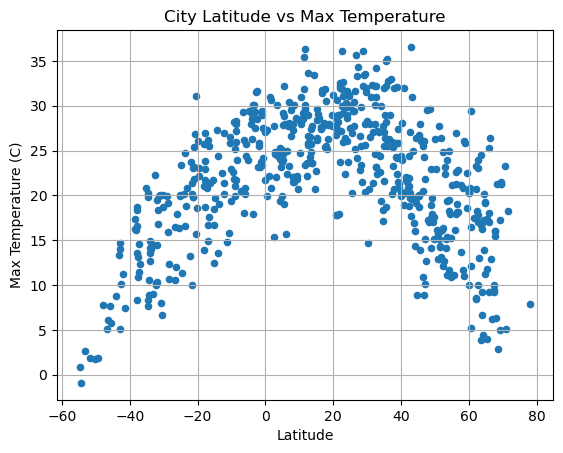

In [8]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind='scatter', x='Lat', y='Max Temp', grid=True, title='City Latitude vs Max Temperature')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

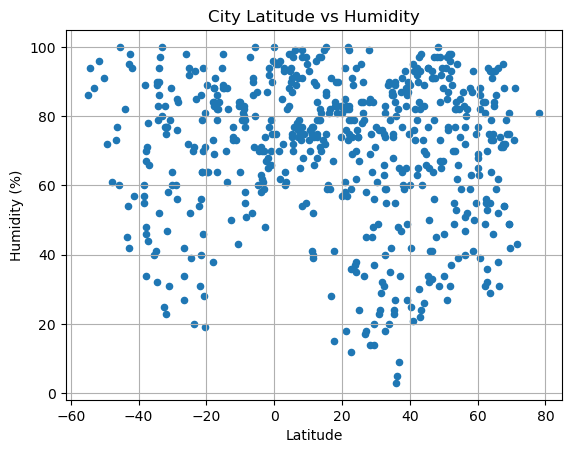

In [9]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind='scatter', x='Lat', y='Humidity', grid=True, title='City Latitude vs Humidity')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

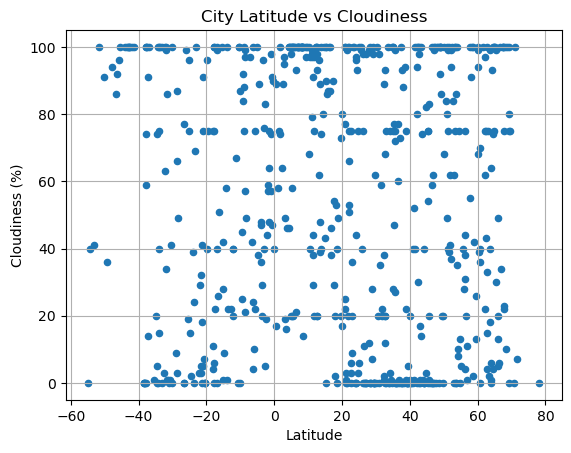

In [10]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind='scatter', x='Lat', y='Cloudiness', grid=True, title='City Latitude vs Cloudiness')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

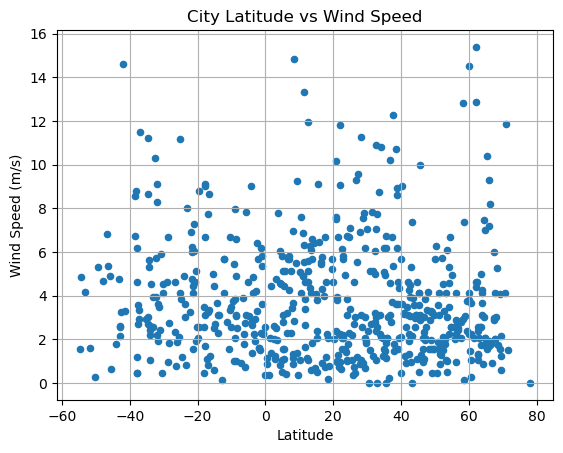

In [11]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind='scatter', x='Lat', y='Wind Speed', grid=True, title='City Latitude vs Wind Speed')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def linear(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    return regress_values, line_eq, rvalue

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,olonkinbyen,70.9221,-8.7187,5.13,88,100,11.84,SJ,1691553704
4,isafjordur,66.0755,-23.1240,9.20,62,13,1.69,IS,1691553704
5,whitehorse,60.7161,-135.0538,16.43,82,40,1.03,CA,1691553705
6,wailua homesteads,22.0669,-159.3780,32.24,82,53,2.24,US,1691553705
7,udachny,66.4167,112.4000,26.36,31,6,8.21,RU,1691553705


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,1.89,96,100,1.62,CL,1691553703
1,port-aux-francais,-49.3500,70.2167,1.81,72,36,5.30,TF,1691553703
3,blackmans bay,-43.0167,147.3167,14.07,54,100,2.60,AU,1691553704
12,adamstown,-25.0660,-130.1015,19.91,92,96,11.18,PN,1691553706
15,waitangi,-43.9535,-176.5597,8.79,82,100,1.79,NZ,1691553707


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.6069433732085416


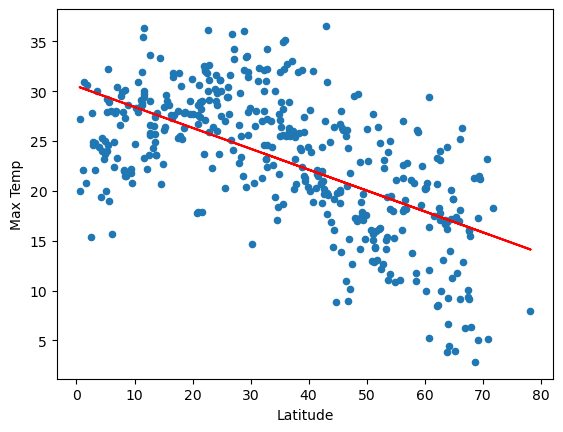

In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
(regress_values, line_eq, rvalue) = linear(x_values, y_values)
northern_hemi_df.plot(kind='scatter', x='Lat', y='Max Temp')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,40),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel('Max Temp')
print(f"The r-value is: {rvalue}")

The r-value is: 0.8126859334253607


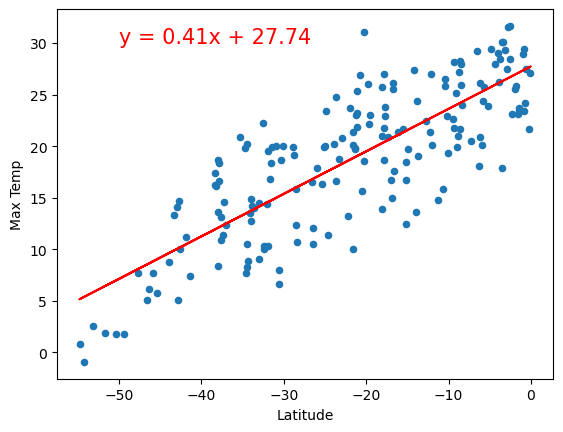

In [16]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(regress_values, line_eq, rvalue) = linear(x_values, y_values)
southern_hemi_df.plot(kind='scatter', x='Lat', y='Max Temp')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel('Max Temp')
print(f"The r-value is: {rvalue}")

**Discussion about the linear relationship:** 
There is a moderate negative correlation between latitude and max temperature for cities in the northern hemisphere. As latitude increases, max temperature decreases.
In reverse, there is a strong positive correlation beween latitude and max temperature for cities in the southern hemisphere. As latitude increases, max temperature increases.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.12054797399691845


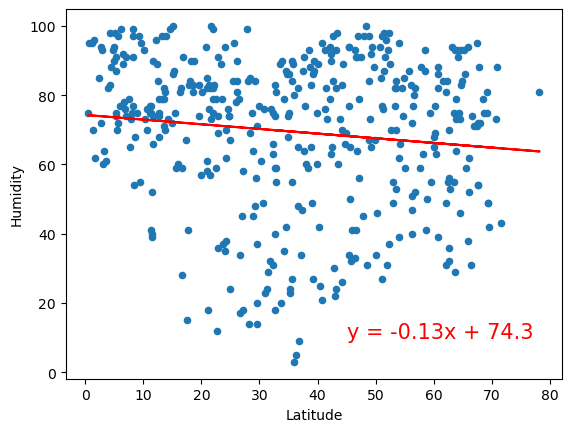

In [17]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
(regress_values, line_eq, rvalue) = linear(x_values, y_values)
northern_hemi_df.plot(kind='scatter', x='Lat', y='Humidity')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue}")

The r-value is: 0.09407618941425977


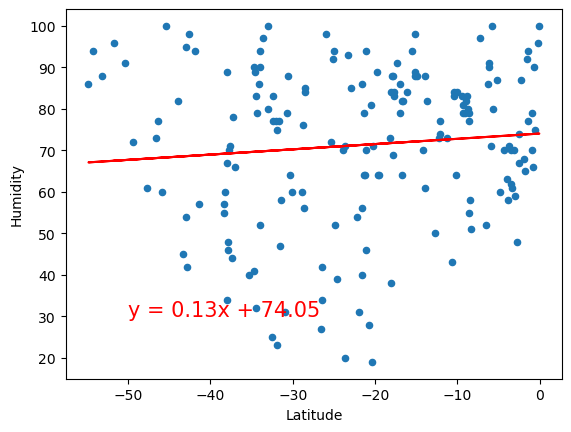

In [18]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
(regress_values, line_eq, rvalue) = linear(x_values, y_values)
southern_hemi_df.plot(kind='scatter', x='Lat', y='Humidity')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue}")

**Discussion about the linear relationship:** There is almost no correlation between latitude and humidity for cities in both northern and southern hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.1537328096639958


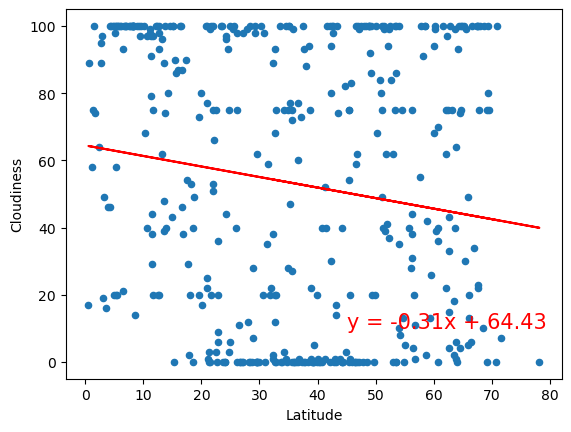

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
(regress_values, line_eq, rvalue) = linear(x_values, y_values)
northern_hemi_df.plot(kind='scatter', x='Lat', y='Cloudiness')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue}")

The r-value is: -0.05572019920673779


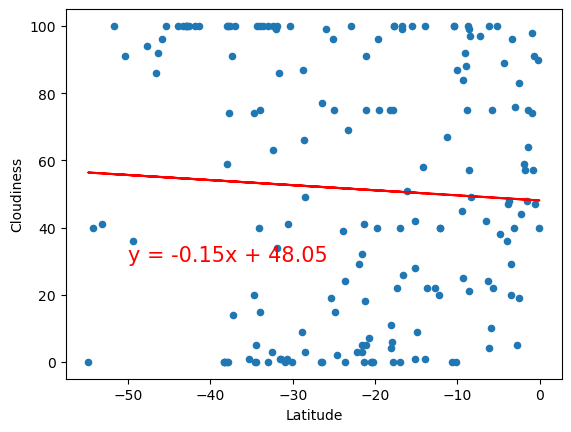

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
(regress_values, line_eq, rvalue) = linear(x_values, y_values)
southern_hemi_df.plot(kind='scatter', x='Lat', y='Cloudiness')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue}")

**Discussion about the linear relationship:** There is almost no correlation between latitude and cloudiness for cities in both northern and southern hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.054907743106228674


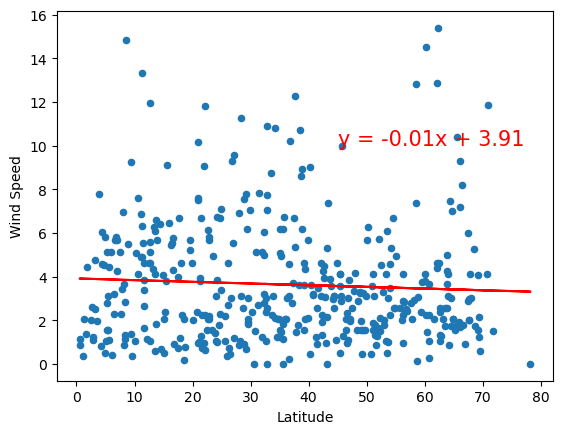

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
(regress_values, line_eq, rvalue) = linear(x_values, y_values)
northern_hemi_df.plot(kind='scatter', x='Lat', y='Wind Speed')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel('Wind Speed')
print(f"The r-value is: {rvalue}")

The r-value is: -0.11174950227962328


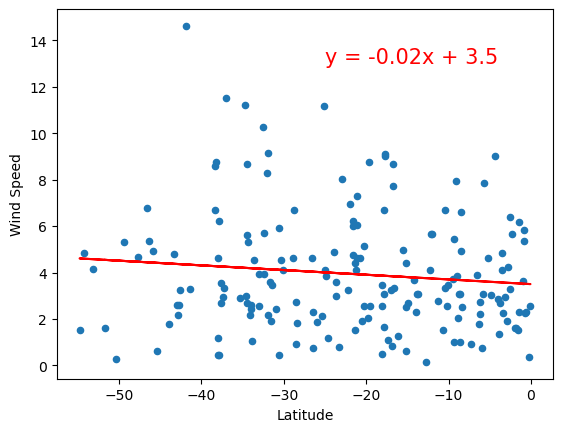

In [23]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
(regress_values, line_eq, rvalue) = linear(x_values, y_values)
southern_hemi_df.plot(kind='scatter', x='Lat', y='Wind Speed')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,13),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel('Wind Speed')
print(f"The r-value is: {rvalue}")

**Discussion about the linear relationship:** The correlation between latitude and cloudiness for cities in both northern and southern hemisphere is very weak.